<a href="https://colab.research.google.com/github/the-redback/ml-getting-started/blob/master/ML_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

TensorFlow 2.x selected.


In [0]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


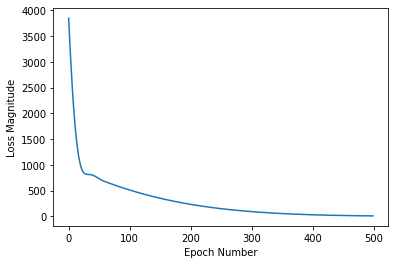

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [0]:
# Prediction
print(model.predict([100.0]))
print("These are the layer variables: {}".format(l0.get_weights()))

[[211.31367]]
These are the layer variables: [array([[1.8238461]], dtype=float32), array([28.92906], dtype=float32)]


# A little experiment

what if we created more Dense layers with different units, which therefore also has more variables?

In [0]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.07868695, -0.10611279, -0.17832601, -0.73199576]],
      dtype=float32), array([ 2.4606433, -3.4779296, -3.5406554, -3.614866 ], dtype=float32)]
These are the l1 variables: [array([[ 0.03019737,  0.08748551, -0.53212124, -0.58641994],
       [-0.45214805,  0.18376231, -0.70744574,  0.952556  ],
       [-0.3471244 ,  0.2541144 , -0.09021325,  1.0628868 ],
       [ 0.52800333, -0.5626421 , -0.14095533,  1.2865958 ]],
      dtype=float32), array([ 2.5364614 , -0.44533923,  3.2013836 , -3.5469077 ], dtype=float32)]
These are the l2 variables: [array([[ 0.3032272 ],
       [-0.023801  ],
       [ 0.48403662],
       [-1.497407  ]], dtype=float32), array([3.3562872], dtype=float32)]


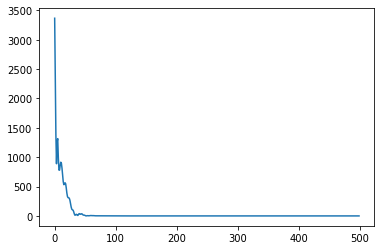

In [0]:
plt.plot(history.history['loss'])
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))